# POC for Genetic Algorithm WOLT

### Imports

In [1]:
import pygad
import numpy as np
import pandas as pd

### helper functions:

In [2]:
FOOD_TYPES = ['burger', 'pizza', 'salad', 'sushi', 'burrito', 'noodles', 'sandwich', 'curry']
DRINK_TYPE = ['water', 'coca-cola', 'pepsi', 'beer']
SIDES_TYPE = ['fries', 'rice', 'beens', 'bread']

def get_random_food_name():
    return f'{np.random.choice(FOOD_TYPES)} with {np.random.choice(SIDES_TYPE)} and ' \
           f'{np.random.choice(DRINK_TYPE)}'

In [3]:
def rand_bool():
    return bool(np.random.randint(0, 2))

def get_random_dish(i):
    return dict(name     = get_random_food_name(),
                price    = np.random.randint(low=20, high=120),
                vegan    = rand_bool(),
                gluten   = rand_bool(),
                spicy    = rand_bool(),
                pregnent = rand_bool())

In [4]:
def print_dish(dish):
    print('-' * 50)
    print(f'{dish["name"]} - {dish["price"]} ₪')
    print(f'vegan: {"✅" if dish["vegan"] else "❌"}', end=' ')
    print(f'gluten: {"✅" if dish["gluten"] else "❌"}', end=' ')
    print(f'spicy: {"✅" if dish["spicy"] else "❌"}', end=' ')
    print(f'pregnent: {"✅" if dish["pregnent"] else "❌"}')
    print('-' * 50)


In [5]:
def get_user_input(people=4, price=250, vegan=None, gluten=None, spicy=None, pregnent=None):
    return dict(people   = people,
                price    = 80 * people if not price else price,
                vegan    = np.zeros(people).astype(bool) if not vegan    else np.array(vegan   ).astype(bool),
                gluten   = np.zeros(people).astype(bool) if not gluten   else np.array(gluten  ).astype(bool),
                spicy    = np.zeros(people).astype(bool) if not spicy    else np.array(spicy   ).astype(bool),
                pregnent = np.zeros(people).astype(bool) if not pregnent else np.array(pregnent).astype(bool))

### Loss (fitness) function:

In [6]:
def fitness_function(solution, solution_idx):
    solution = [database[i] for i in solution]
#     [print(dish) for dish in solution]
    
    total_price = sum([dish['price'] for dish in solution])
    price_const =  total_price < user_input['price']
    
    vegan_const    = [dish['vegan'] == inp for (dish, inp) in zip(solution, user_input['vegan'])]    
    gluten_const   = [dish['gluten'] == inp for (dish, inp) in zip(solution, user_input['gluten'])]    
    spicy_const    = [dish['spicy'] == inp for (dish, inp) in zip(solution, user_input['spicy'])]    
    pregnent_const = [dish['pregnent'] == inp for (dish, inp) in zip(solution, user_input['pregnent'])]  
    
    hard_const = all([price_const,
                      all(vegan_const),
                      all(gluten_const),
                      all(spicy_const),
                      all(pregnent_const)])
    
    soft_price = (user_input['price'] - total_price) / user_input['price']
    soft_const = np.mean([soft_price,
                          sum(vegan_const)    / user_input['people'], 
                          sum(gluten_const)   / user_input['people'],
                          sum(spicy_const)    / user_input['people'],
                          sum(pregnent_const) / user_input['people'],
                         ])
    fitness = np.mean([int(hard_const), soft_const])
    res.append(fitness)

    return fitness

### Initialize

In [7]:
database = [get_random_dish(i) for i in range(100)]
res = []

### User input:

In [8]:
user_input = get_user_input(people=4, price=250, vegan=[0, 0, 1, 1], gluten=[0, 1, 0, 0])
user_input

{'people': 4,
 'price': 250,
 'vegan': array([False, False,  True,  True]),
 'gluten': array([False,  True, False, False]),
 'spicy': array([False, False, False, False]),
 'pregnent': array([False, False, False, False])}

# Algorithm run:

----------------- Best solution ------------------

Fitness:          0.9464
Hard constraints: 🏆
Total price:      134 ₪ (limit was 250 ₪)

--------------------------------------------------
pizza with bread and pepsi - 30 ₪
vegan: ❌ gluten: ❌ spicy: ❌ pregnent: ❌
--------------------------------------------------
--------------------------------------------------
sandwich with beens and pepsi - 34 ₪
vegan: ❌ gluten: ✅ spicy: ❌ pregnent: ❌
--------------------------------------------------
--------------------------------------------------
sandwich with beens and water - 35 ₪
vegan: ✅ gluten: ❌ spicy: ❌ pregnent: ❌
--------------------------------------------------
--------------------------------------------------
sandwich with beens and water - 35 ₪
vegan: ✅ gluten: ❌ spicy: ❌ pregnent: ❌
--------------------------------------------------
Evolution Plot:


<AxesSubplot:>

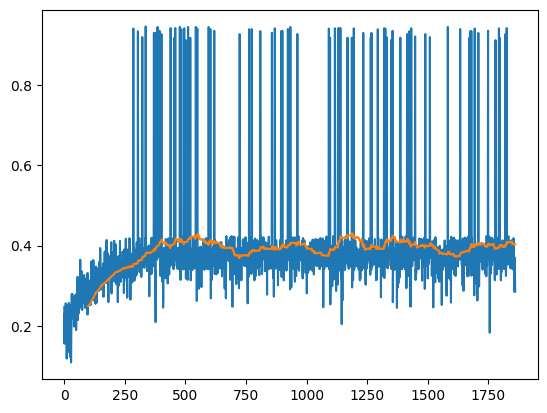

In [9]:
res = []

# choose run params:
ga_instance = pygad.GA(num_generations         = 1000,
                       num_parents_mating      = 20,
                       sol_per_pop             = 30,
                       num_genes               = user_input['people'],

#                        init_range_low          = 0,
#                        init_range_high         = len(database),
                       
                       random_mutation_min_val = 0,
                       random_mutation_max_val = len(database),
                       
                       mutation_by_replacement = True,
                       mutation_num_genes      = 1,
                       mutation_probability    = 0.05,
                       
                       gene_type               = int,
                       fitness_func            = fitness_function,
                      )

# run:
ga_instance.run()

# print solution:
solution, fitness, i = ga_instance.best_solution()
solution = [database[i] for i in solution]

print(f'----------------- Best solution ------------------\n')
print(f'Fitness:          {fitness}')
print(f'Hard constraints: {"🏆" if fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(dish) for dish in solution]

print('Evolution Plot:')
pd.Series(res).plot()
pd.Series(res).rolling(window=100).mean().plot()

In [10]:
# print('initial:')
# [([print(database[dish]) for dish in solution], print()) for solution in ga_instance.initial_population]

# print('res:')
# [([print(database[dish]) for dish in solution], print()) for solution in ga_instance.population]

# print()